<a href="https://colab.research.google.com/github/joao-gabriel-barbara/analise-climatica-sp/blob/main/analise_clima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

*Carregamento de Dados*

In [ ]:
temp_df = pd.read_csv(r"/content/sample_data/datasp.csv",
                      skiprows=3,
                      index_col="time",
                      parse_dates=True)
temp_df

,temperature_2m (°C),rain (mm)
time,,
1940-01-01 00:00:00,16.1,NaN
1940-01-01 01:00:00,16.1,NaN
1940-01-01 02:00:00,16.3,NaN
1940-01-01 03:00:00,16.4,NaN
1940-01-01 04:00:00,16.4,0.0
...,...,...
2025-11-15 19:00:00,20.6,0.0
2025-11-15 20:00:00,19.8,0.0
2025-11-15 21:00:00,19.6,0.0


In [ ]:
# Verifica se há dados Nulos
print("Dados nulos em temperatura:")
temp_df.isna().sum()


Dados nulos em temperatura:


,0
temperature_2m (°C),0
rain (mm),4


In [ ]:
# Preenchendo NaN com 0

temp_df['rain (mm)'] = temp_df['rain (mm)'].fillna(0)


In [ ]:
print("Estatísticas básicas dos dados de temperatura e chuva:")
temp_df.describe()

Estatísticas básicas dos dados de temperatura e chuva:


,temperature_2m (°C),rain (mm)
count,752784.000000,752784.000000
mean,19.386573,0.155383
std,4.384271,0.607440
min,1.600000,0.000000
25%,16.300000,0.000000
50%,19.300000,0.000000
75%,22.200000,0.000000
max,38.400000,26.500000


<Axes: >

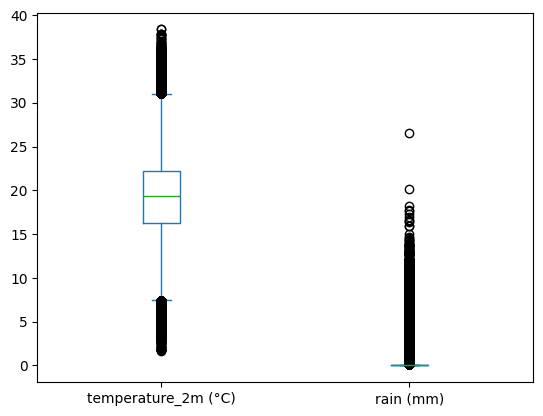

In [ ]:
#Verificação de outliers
temp_df.plot(kind="box")

*Análise de Dados*


In [ ]:
# Buscando valores mínimos e máximos de temperatura

print("Dia mais frio da história de São Paulo:")
dia_mais_frio = temp_df["temperature_2m (°C)"].idxmin()
print(dia_mais_frio)

print("Dia mais quente da história de São Paulo:")
dia_mais_quente = temp_df["temperature_2m (°C)"].idxmax()
print(dia_mais_quente)

Dia mais frio da história de São Paulo:
2021-07-30 06:00:00
Dia mais quente da história de São Paulo:
1961-09-28 14:00:00


In [ ]:
# Buscando valores mínimos e máximos de chuva

print("Menor chuva da história de São Paulo:")
menor_chuva = temp_df["rain (mm)"].idxmin()
print(menor_chuva)

print("Maior chuva da história de São Paulo:")
maior_chuva = temp_df["rain (mm)"].idxmax()
print(maior_chuva)

Menor chuva da história de São Paulo:
1940-01-01 00:00:00
Maior chuva da história de São Paulo:
1991-01-27 10:00:00


<Axes: xlabel='time'>

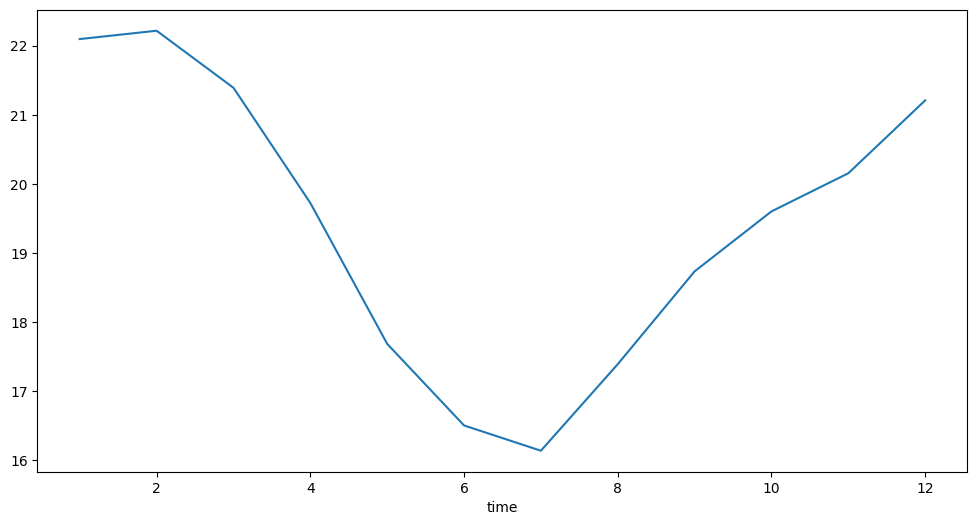

In [ ]:
# Médias históricas mensais temperatura
medias_mensais_temperatura = temp_df["temperature_2m (°C)"].groupby(temp_df.index.month).mean()
medias_mensais_temperatura.plot(figsize=(12,6))


<Axes: xlabel='time'>

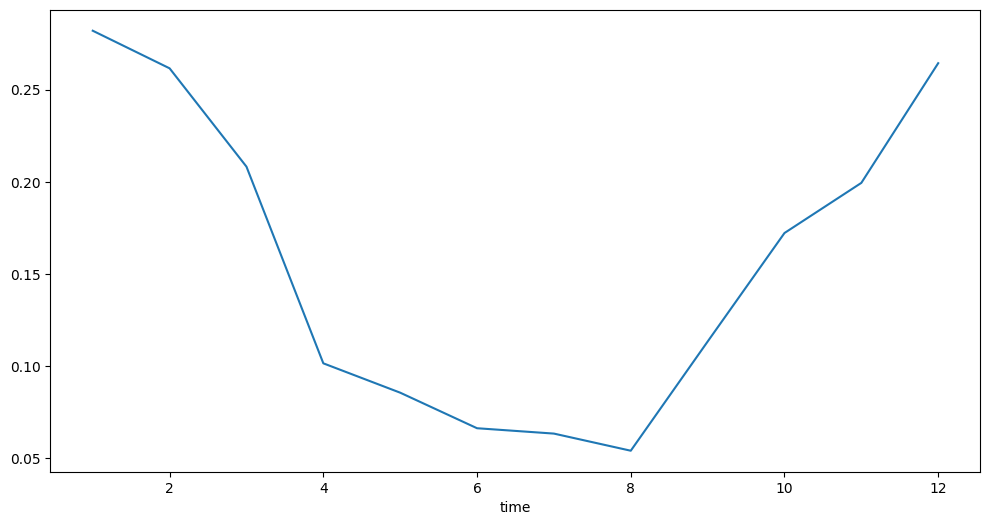

In [ ]:
# Médias históricas mensais chuva
medias_mensais_chuva = temp_df["rain (mm)"].groupby(temp_df.index.month).mean()
medias_mensais_chuva.plot(figsize=(12,6))

<Axes: xlabel='time'>

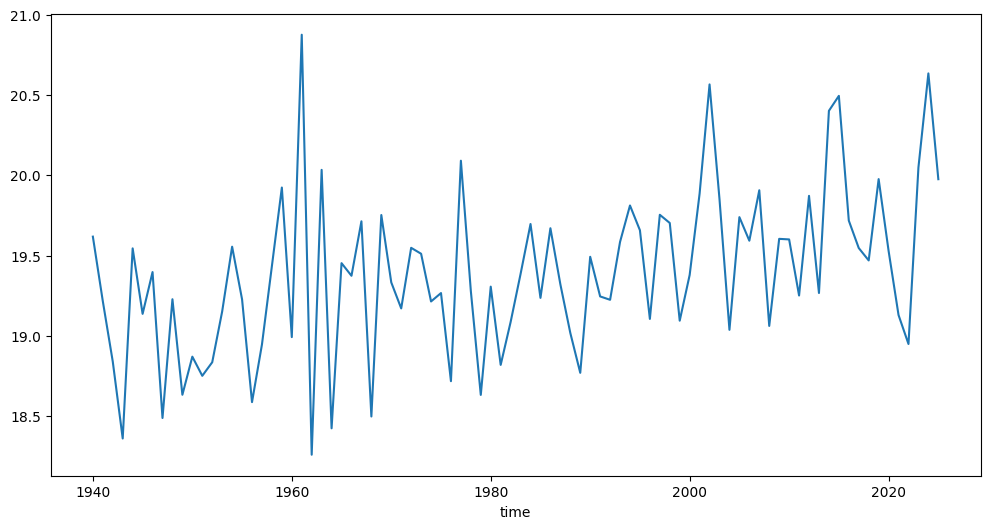

In [ ]:
#Médias históricas anuais temperatura
medias_anuais_temperatura = temp_df["temperature_2m (°C)"].groupby(temp_df.index.year).mean()
medias_anuais_temperatura.plot(figsize=(12,6))

<Axes: xlabel='time'>

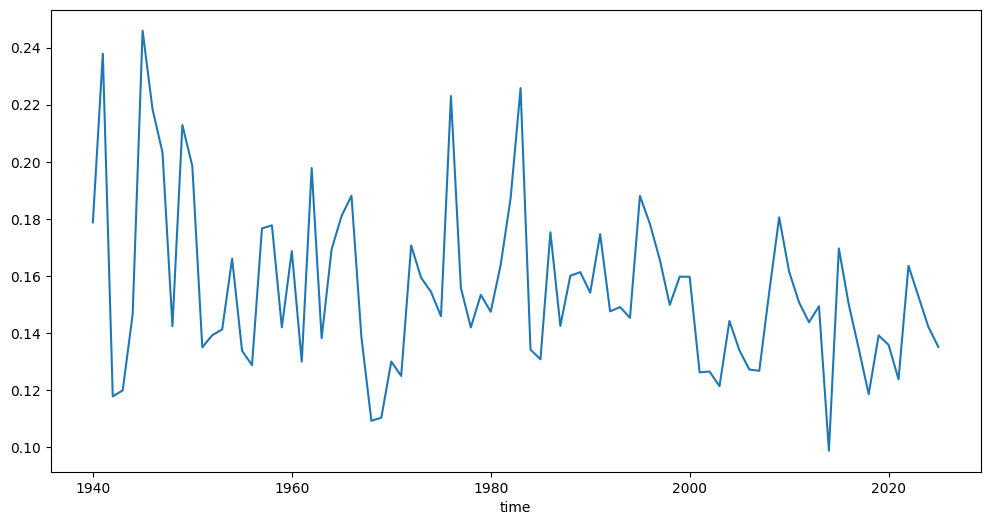

In [ ]:
#Médias históricas anuais chuva
medias_anuais_temperatura = temp_df["rain (mm)"].groupby(temp_df.index.year).mean()
medias_anuais_temperatura.plot(figsize=(12,6))

*Previsão de temperatura e chuva para os próximos 365 dias*

In [ ]:
from prophet import Prophet

In [ ]:
df_prev = pd.read_csv(r"/content/sample_data/datasp.csv",
                      skiprows=3,
                      parse_dates=True)

df_prev.columns = df_prev.columns.str.lower()

df_prev[['rain (mm)', 'temperature_2m (°c)']] = df_prev[['rain (mm)', 'temperature_2m (°c)']].fillna(0)

df_prev['time'] = pd.to_datetime(df_prev['time'], errors='coerce')

df_prev

,time,temperature_2m (°c),rain (mm)
0,1940-01-01 00:00:00,16.1,0.0
1,1940-01-01 01:00:00,16.1,0.0
2,1940-01-01 02:00:00,16.3,0.0
3,1940-01-01 03:00:00,16.4,0.0
4,1940-01-01 04:00:00,16.4,0.0
...,...,...,...
752779,2025-11-15 19:00:00,20.6,0.0
752780,2025-11-15 20:00:00,19.8,0.0
752781,2025-11-15 21:00:00,19.6,0.0
752782,2025-11-15 22:00:00,19.2,0.0


In [ ]:
df_meses = df_prev.set_index('time').resample('M').agg({
    'rain (mm)': 'sum',
    'temperature_2m (°c)': 'mean'
}).reset_index().rename(columns={'time': 'ds'})

/tmp/ipython-input-1741797185.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_meses = df_prev.set_index('time').resample('M').agg({


In [ ]:
print("Linhas mensais:", len(df_meses))
df_meses.tail()

Linhas mensais: 1031


,ds,rain (mm),temperature_2m (°c)
1026,2025-07-31,10.5,15.835753
1027,2025-08-31,29.4,17.561156
1028,2025-09-30,18.3,19.551944
1029,2025-10-31,150.8,19.544758
1030,2025-11-30,65.2,20.186111


Treinando o *Prophet*

*Temperatura*

In [ ]:
df_temp = df_meses[['ds', 'temperature_2m (°c)']].rename(columns={'temperature_2m (°c)': 'y'})
df_temp

,ds,y
0,1940-01-31,21.296909
1,1940-02-29,20.231034
2,1940-03-31,21.138844
3,1940-04-30,20.501944
4,1940-05-31,18.878091
...,...,...
1026,2025-07-31,15.835753
1027,2025-08-31,17.561156
1028,2025-09-30,19.551944
1029,2025-10-31,19.544758


In [ ]:
m_temp = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    mcmc_samples=0
)

In [ ]:
m_temp.fit(df_temp)

In [ ]:
future_temp = m_temp.make_future_dataframe(periods=12, freq='ME')
forecast_temp = m_temp.predict(future_temp)

In [ ]:
result_temp = forecast_temp[['ds','yhat','yhat_lower','yhat_upper']].set_index('ds')
print(result_temp.tail(12))

                 yhat  yhat_lower  yhat_upper
ds                                           
2025-12-31  21.682935   20.340620   23.040330
2026-01-31  22.601334   21.383430   23.898636
2026-02-28  22.770928   21.539489   24.236789
2026-03-31  21.853197   20.552856   23.088145
2026-04-30  20.164114   18.874859   21.460280
2026-05-31  18.140007   16.764437   19.449925
2026-06-30  16.942805   15.586528   18.222908
2026-07-31  16.673764   15.360187   18.004113
2026-08-31  17.874808   16.466167   19.138435
2026-09-30  19.155625   17.884985   20.512799
2026-10-31  20.052586   18.736546   21.424013
2026-11-30  20.633705   19.290901   22.016277


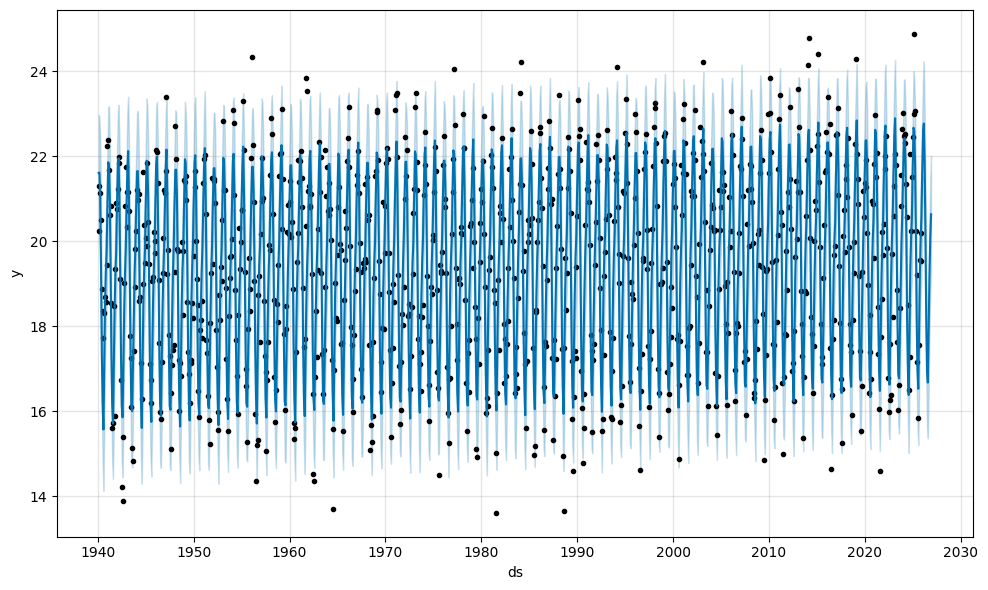

In [ ]:
fig1_temp = m_temp.plot(forecast_temp)

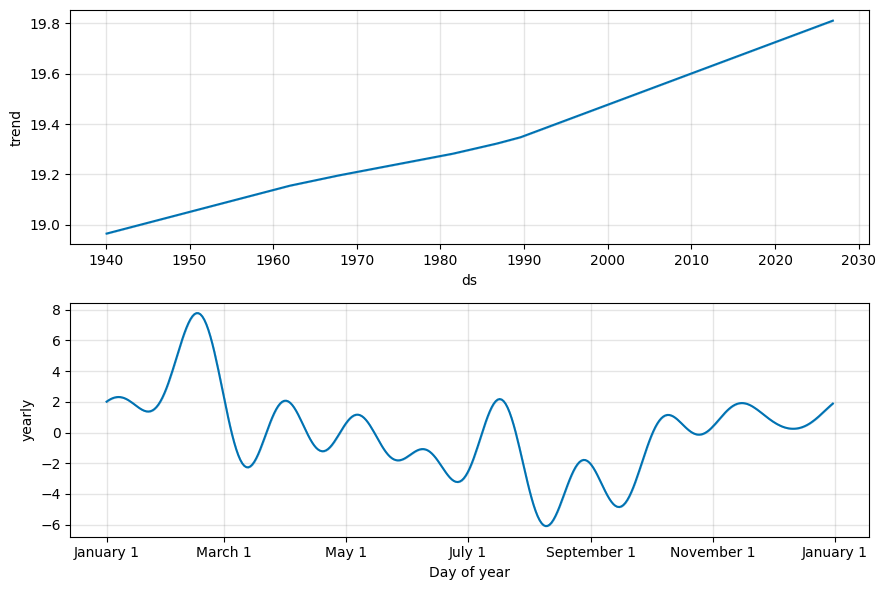

In [ ]:
fig2_temp = m_temp.plot_components(forecast_temp)

*Chuva*

In [ ]:
df_chuva = df_meses[['ds','rain (mm)']].rename(columns={'rain (mm)': 'y'})
df_chuva

,ds,y
0,1940-01-31,320.1
1,1940-02-29,321.4
2,1940-03-31,168.9
3,1940-04-30,54.5
4,1940-05-31,45.6
...,...,...
1026,2025-07-31,10.5
1027,2025-08-31,29.4
1028,2025-09-30,18.3
1029,2025-10-31,150.8


In [ ]:
m_chuva = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    mcmc_samples=0
)

In [ ]:
m_chuva.fit(df_chuva)

In [ ]:
future = m_chuva.make_future_dataframe(periods=12, freq='ME')
forecast = m_chuva.predict(future)

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [ ]:
result = forecast[['ds','yhat','yhat_lower','yhat_upper']].set_index('ds')
print(result.tail(12))

                  yhat  yhat_lower  yhat_upper
ds                                            
2025-12-31  185.364991  116.987857  255.117310
2026-01-31  201.734800  134.859015  268.178546
2026-02-28  167.092175   98.012894  231.526124
2026-03-31  147.603462   81.381675  220.125074
2026-04-30   60.269662   -6.012083  127.877497
2026-05-31   51.980968  -17.377637  116.288024
2026-06-30   35.534383  -33.862536  104.875962
2026-07-31   35.899557  -41.139128   96.676885
2026-08-31   27.320670  -41.090608   98.034269
2026-09-30   72.696731    5.963775  140.235489
2026-10-31  115.993418   46.131010  184.691238
2026-11-30  131.762967   67.922531  197.733705


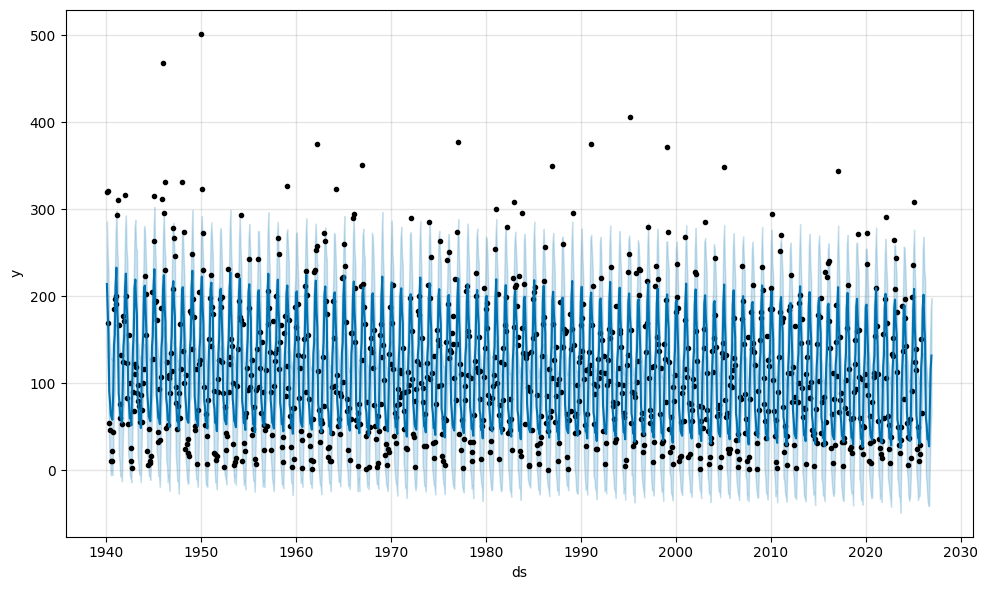

In [ ]:
fig1 = m_chuva.plot(forecast)

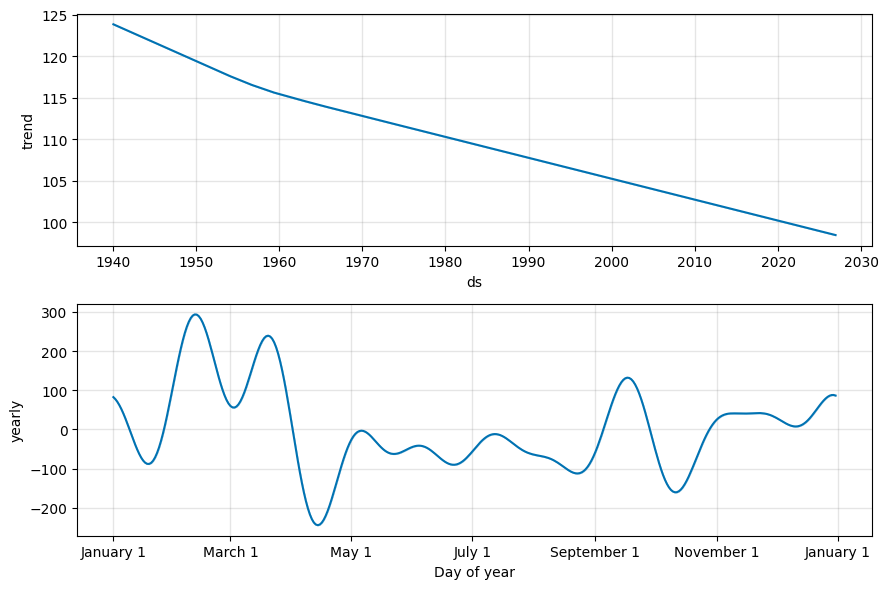

In [ ]:
fig2 = m_chuva.plot_components(forecast)